In [220]:
import matplotlib.pyplot as plt
import numpy as np

In [233]:
data_points = np.random.randint(low = -20,high=20, size=200)
x = data_points[:100]
y = data_points[100:]


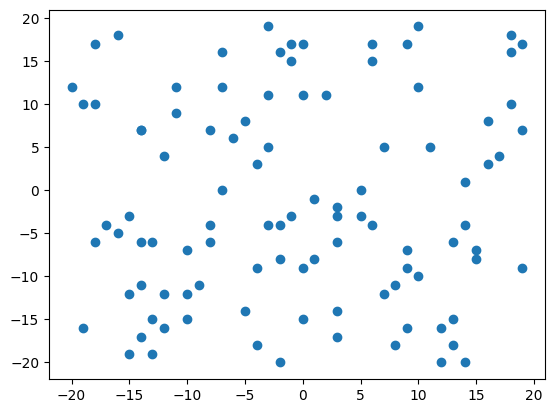

In [234]:
plt.scatter(x, y)

In [239]:
a = np.random.random()*3
b = np.random.random()*3
# y = a*x + b
a ,b

(2.37551884064591, 1.05118178813707)

In [241]:
max_iters = 1000

for _ in range(max_iters):

    dist = np.abs(a*x + y+b)/np.sqrt(a**2 + b**2).sum()
    da = x
    db = 1
    a -= da
    b -= db
    
            
print(dist)

[18.02675676  2.2289098  10.05087187 10.05136925  0.98897459  2.23964572
 18.02681253  1.41988549  7.07035971 14.03709544 16.03071991 14.03645317
 11.04454548  5.10176652 13.03986319  8.06300238 19.02713923  1.41633352
  5.09901948 15.03382912  4.12747315 16.03103217  8.06362388  2.24501368
 14.03516965 17.02962142 18.02686783  9.05715426  8.06138877  6.08029302
 13.03886551 14.03559749 11.04490775  2.2378564   9.05350537  9.05638026
 12.04292488  6.08342102 19.02592924  5.09744945 13.03955615  6.08177533
 17.02915118  3.15626649  8.06275414  3.16417847 14.03516965 12.04259187
 15.03456126 11.04427365  3.16291126  3.15879731 13.03886531  7.06936945
 14.03595414  7.07276713  1.40218663 10.05057261  7.07106768  2.23113797
 14.03609663 19.0257715   9.0566007  18.02720102  9.05615911 12.04325746
  1.00901564 15.03349606  1.40360131 18.02808945 13.03978696  7.06880338
 16.03009573 14.03688101 15.03376253 12.04292432  4.12528924 10.05107051
  4.12237734  3.16766331 12.04126206 10.04798266 19

In [217]:
a ,b

(tensor([-198.5882], requires_grad=True),
 tensor([-220.0073], requires_grad=True))

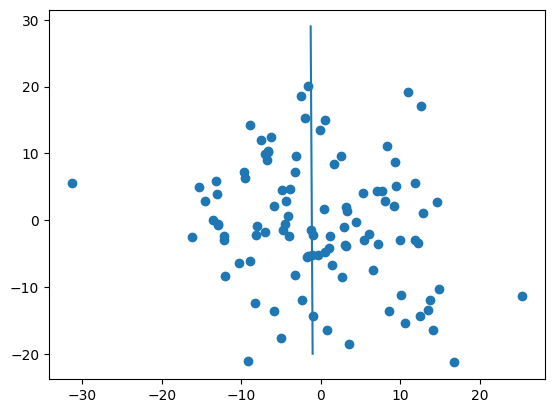

In [218]:
for i in [a, b]:
    i.requires_grad = False

# Plotting data points
plt.scatter(data_points[0], data_points[1])

y_ex = torch.arange(-20, 30, 1)
x_ex = (y_ex-b)/a
plt.plot(x_ex, y_ex)

plt.show()